In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [27]:
dataset = pd.read_csv('data_cancer.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [29]:
x=dataset.iloc[:, 2:31].values
y=dataset.iloc[:, 1].values

In [30]:
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [31]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [32]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalComponents

array([[ 8.96633572,  1.98441334],
       [ 2.46306433, -3.8564838 ],
       [ 5.7772529 , -0.84150267],
       ...,
       [ 1.35140392, -1.80703584],
       [10.11560902,  1.57811433],
       [-5.3991993 , -0.74417872]])

In [33]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,8.966336,1.984413
1,2.463064,-3.856484
2,5.777253,-0.841503
3,6.283637,9.494189
4,4.077171,-1.544879
...,...,...
564,6.684398,-2.941619
565,4.046137,-3.084500
566,1.351404,-1.807036
567,10.115609,1.578114


In [34]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.25)

In [35]:
model = Sequential()
model.add(Dense(16, input_dim=len(principalComponents[0]), activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model_pca.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=1, epochs=40, validation_split=.3, callbacks=[es, mc])

Train on 298 samples, validate on 128 samples
Epoch 1/40
298/298 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5302 - val_loss: 0.6351 - val_accuracy: 0.6953

Epoch 00001: val_accuracy improved from -inf to 0.69531, saving model to best_model_pca.h5
Epoch 2/40
298/298 [==============================] - 0s 1ms/step - loss: 0.6357 - accuracy: 0.6242 - val_loss: 0.5797 - val_accuracy: 0.6953

Epoch 00002: val_accuracy did not improve from 0.69531
Epoch 3/40
298/298 [==============================] - 0s 1ms/step - loss: 0.5833 - accuracy: 0.6275 - val_loss: 0.5068 - val_accuracy: 0.6953

Epoch 00003: val_accuracy did not improve from 0.69531
Epoch 4/40
298/298 [==============================] - 0s 1ms/step - loss: 0.5041 - accuracy: 0.8490 - val_loss: 0.4121 - val_accuracy: 0.9453

Epoch 00004: val_accuracy improved from 0.69531 to 0.94531, saving model to best_model_pca.h5
Epoch 5/40
298/298 [==============================] - 0s 1ms/step - loss: 0.4106 - accu

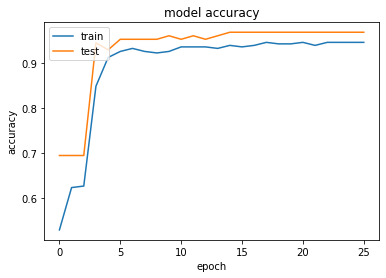

In [36]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
predictions = model.predict(X_test, batch_size=32)
print(classification_report(y_test,predictions.round(),target_names=lb.classes_))

              precision    recall  f1-score   support

           B       0.98      0.99      0.98        82
           M       0.98      0.97      0.98        61

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

